Pesos calculados: 
Polinomio # 1
[1.00000000000000]

Polinomio # 2
[0.853553622996350 0.146446604078364]

Polinomio # 3
[0.711092459854296 0.278517701799342 0.0103892567218427]

Polinomio # 4
[0.603153854722504 0.357418658053832 0.0388879152090482
 0.000539294683574783]

Polinomio # 5
[0.521755892103933 0.398666700111838 0.0759424638523881
 0.00361175495353691 2.33699738752504e-5]

Polinomio # 6
[0.458964743149350 0.417000918823691 0.113373256100527 0.0103991992486375
 0.000261017469344282 8.98547867025795e-7]

Polinomio # 7
[0.409318180584277 0.421831247027137 0.147126577223694 0.0206334166578986
 0.00107401091710446 1.58654664330454e-5 3.17031601787223e-8]

Polinomio # 8
[0.369189899393329 0.418786935399684 0.175795097977579 0.0333437421964530
 0.00279453144380518 9.07653897532598e-5 8.48576310604512e-7
 1.04800061129633e-9]

Polinomio # 9
[0.336127587059180 0.411215812315929 0.199287502611633 0.0474607161694045
 0.00559971651367980 0.000305268415980451 6.59216859301375e-6
 4.1107704

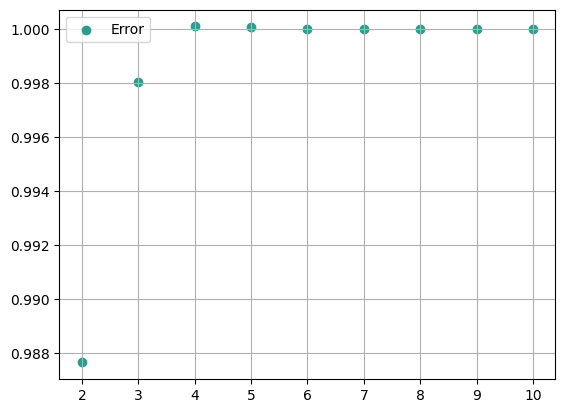

In [3]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
import math

# Cálculo pesos Laguerre: 
def derivada(f,x,h=0.01):
    return (f(x+h)-f(x-h))/(2*h)

def polinomio_n(n):
    x = sp.Symbol("x")
    f1 = (x**n * sp.exp(-x))
    c = (sp.exp(x) / math.factorial(n))
    df1 = sp.diff(f1,x,n)
    f = sp.expand(c*df1)
    def evaluar(xi):
        return f.subs("x",xi).evalf()
    
    return evaluar, f
        
def newton_raphson(f, df, xn, itmax=1000, precision=1e-10):
    error = 1
    it = 1
    while error > precision and it < itmax:
        try:
            xn1 = xn - (f(xn)/df(f,xn))
        except ZeroDivisionError:
            return False
        error = np.abs(xn1 - xn)
        xn = xn1
        it += 1
    if it == itmax:
        return False
    else:
        return xn

def get_roots(f,df,X,tol=7):
    roots=np.array([])
    for i in X:
        root = newton_raphson(f,df,i)
        if root != False:
            root = round(root,tol)
            if root not in roots:
                roots = np.append(roots,root)          
    return np.sort(roots)
     
def GetWeights(n):
    X = np.linspace(0,50,200)
    Weights = np.array([])
    poly = polinomio_n(n)[0]   
    Roots = get_roots(poly,derivada,X)
    poly_cons = polinomio_n(n+1)[0]
    
    for r in Roots:
        Weights = np.append(Weights, r / ((n+1)**2 * poly_cons(r)**2))

    return Weights

def primeros_n_pesos(n):
    for i in range(1,n+1):
        print("Polinomio #", i)
        print(GetWeights(i))
        print("")
        
print("Pesos calculados: ")
primeros_n_pesos(11)

# a) Integral con gauss-laguerre n=3:
def funcion(x):
    return np.exp(x) * (x**3 / (np.exp(x)-1))

def integral_n(n):
    roots, weights = np.polynomial.laguerre.laggauss(n)
    integral = np.sum(weights * funcion(roots))
    return integral

print("Aproximación con n=3:", integral_n(3))

# b) Gráfica error
def error(estimado,real):
    return estimado/real

fig, ax = plt.subplots()
X = np.array([x for x in range(2,11)])
I = np.array([integral_n(x) for x in X])
Y = error(I, np.pi**4/15)
ax.scatter(X,Y,label="Error",color="#2a9d8f")
ax.grid(True)
plt.legend()
plt.show()
